<a href="https://colab.research.google.com/github/Guptarohit2003/Machine-Learning/blob/main/Projects/Customer_Churn_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOMER CHURN PREDICTION

**OBJECTIVE**: Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Data Preprocessing

## Importing Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_val_score, GridSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message="[LightGBM]")

## Loading Dataset

In [ ]:
# converting excel file to csv

excel_file = pd.read_excel('customer_churn_large_dataset.xlsx')
excel_file.to_csv('customer_churn_large_dataset.csv',header = True)

In [ ]:
# loading csv
df = pd.read_csv('customer_churn_large_dataset.csv', index_col = 0)

## EDA

In [ ]:
# first 5 observation
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [ ]:
df['Churn'].value_counts(normalize = True)

0    0.50221
1    0.49779
Name: Churn, dtype: float64

In [ ]:
# Size of dataset
df.shape

(100000, 9)

In [ ]:
# Feature Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 7.6+ MB


In [ ]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
5%,5000.950000,20.000000,2.000000,33.530000,72.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
90%,90000.100000,65.000000,22.000000,93.080000,456.000000,1.000000
95%,95000.050000,68.000000,23.000000,96.510000,478.000000,1.000000


In [ ]:
# Columns in dataset

df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

### Independent Features

In [ ]:
# Categorical_Variables

categorical_columns = [col for col in df.columns if col in '0' or df[col].nunique() <= 11 and col not in 'Churn']
categorical_columns

['Gender', 'Location']

In [ ]:
# Numerical_variables

numerical_columns = [col for col in df.columns if df[col].dtype != 'object' and df[col].nunique() > 11 and col not in "Name"]
numerical_columns

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB']

### Dependent Variable

In [ ]:
df.Churn.unique()

array([0, 1])

In [ ]:
# Values count of dependent Variable
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [ ]:
churned = df.loc[df['Churn'] == 1]
not_churned = df.loc[df['Churn'] == 0]

### Categorical Variables analysis with respect to Dependent Variable

In [ ]:
for cat in categorical_columns:
  print("______________________________________________________")
  print("Frequency of not_churn group according to {}".format(cat))
  print(not_churned[cat].value_counts().sort_values())
  print("Frequency of churn group according to {}".format(cat))
  print(not_churned[cat].value_counts().sort_values())

______________________________________________________
Frequency of not_churn group according to Gender
Male      24949
Female    25272
Name: Gender, dtype: int64
Frequency of churn group according to Gender
Male      24949
Female    25272
Name: Gender, dtype: int64
______________________________________________________
Frequency of not_churn group according to Location
New York        9834
Miami           9955
Chicago        10013
Los Angeles    10161
Houston        10258
Name: Location, dtype: int64
Frequency of churn group according to Location
New York        9834
Miami           9955
Chicago        10013
Los Angeles    10161
Houston        10258
Name: Location, dtype: int64


### Numerical Variables analysis with respect to Dependent Variable

_____________________________________________________________________________________________________________________________________
Distribution of the CustomerID for Not Churned


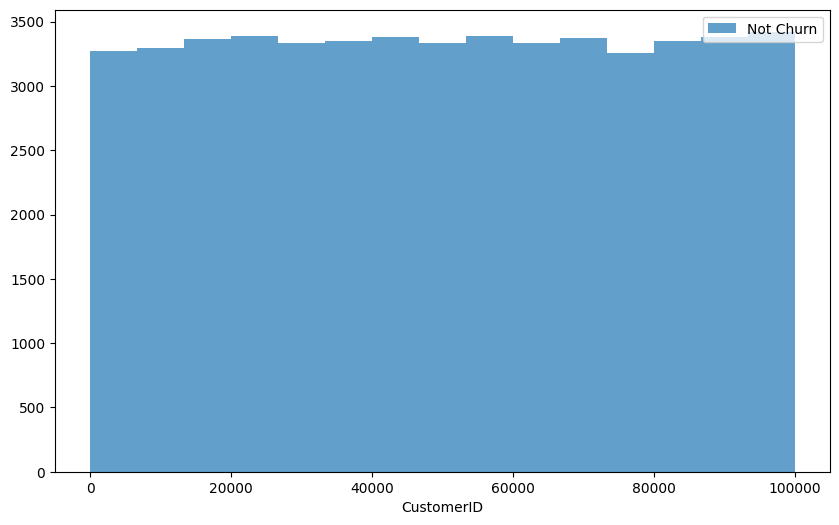

_____________________________________________________________________________________________________________________________________
Distribution of the Age for Not Churned


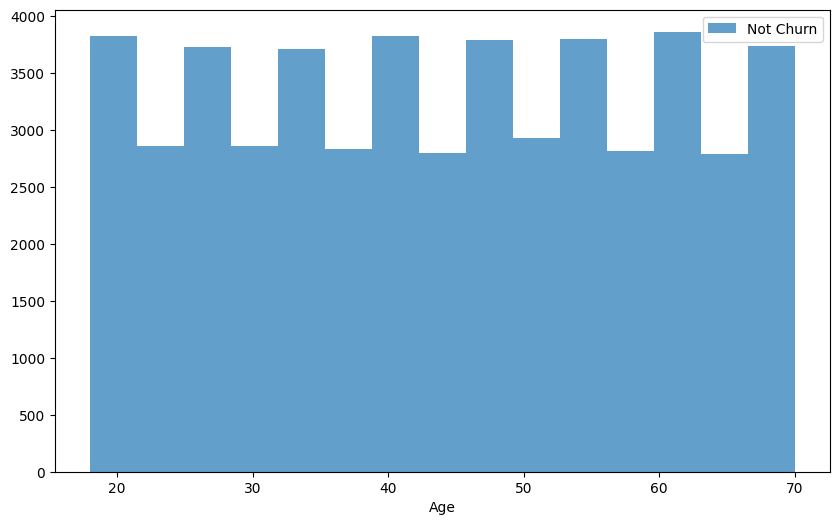

_____________________________________________________________________________________________________________________________________
Distribution of the Subscription_Length_Months for Not Churned


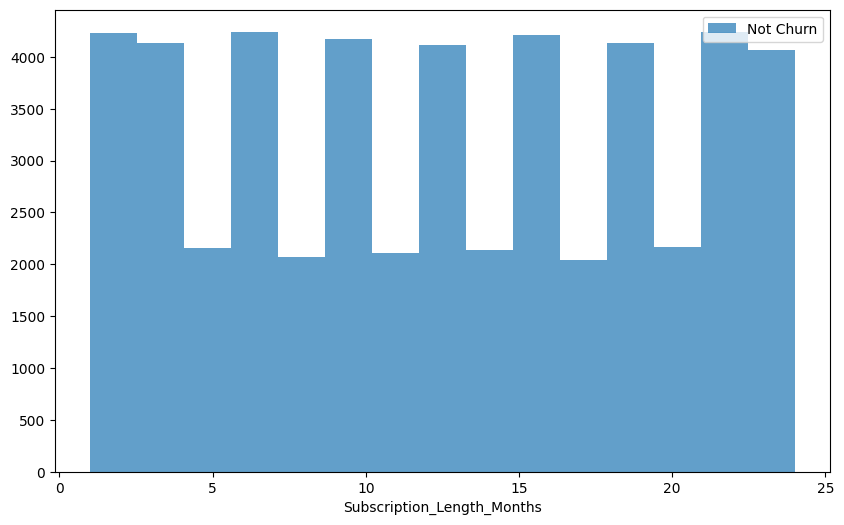

_____________________________________________________________________________________________________________________________________
Distribution of the Monthly_Bill for Not Churned


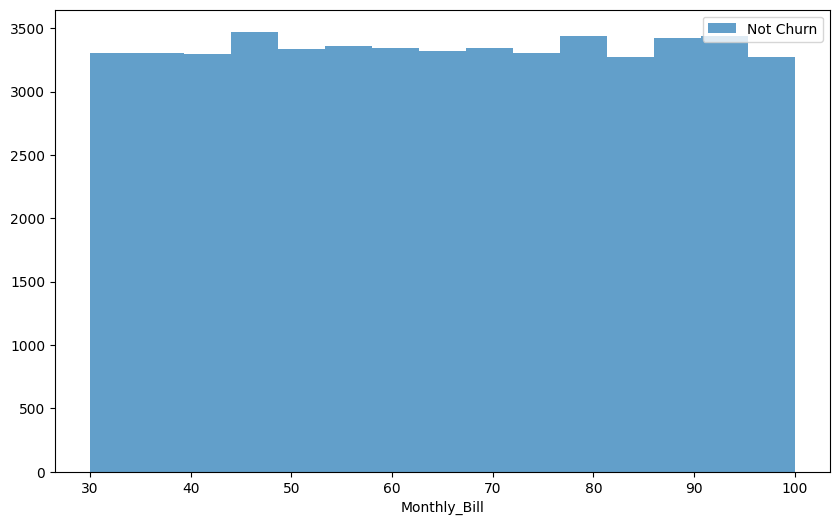

_____________________________________________________________________________________________________________________________________
Distribution of the Total_Usage_GB for Not Churned


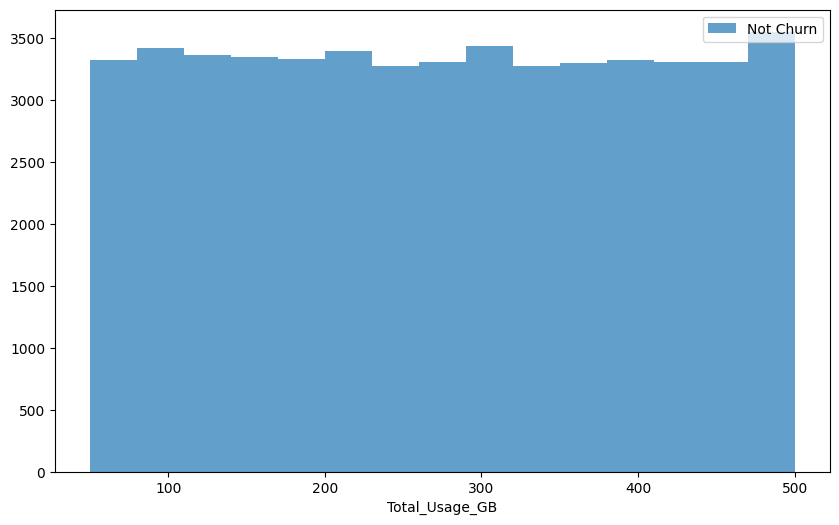

In [ ]:
for num in numerical_columns:
    print("_____________________________________________________________________________________________________________________________________")
    print("Distribution of the {} for Not Churned".format(num))
    plt.figure(figsize=(10,6))
    plt.xlabel(num)
    plt.hist(not_churned[num],bins=15, alpha=0.7, label="Not Churn")
    plt.legend(loc='upper right')
    plt.show()

_____________________________________________________________________________________________________________________________________
Distribution of the CustomerID for Churned


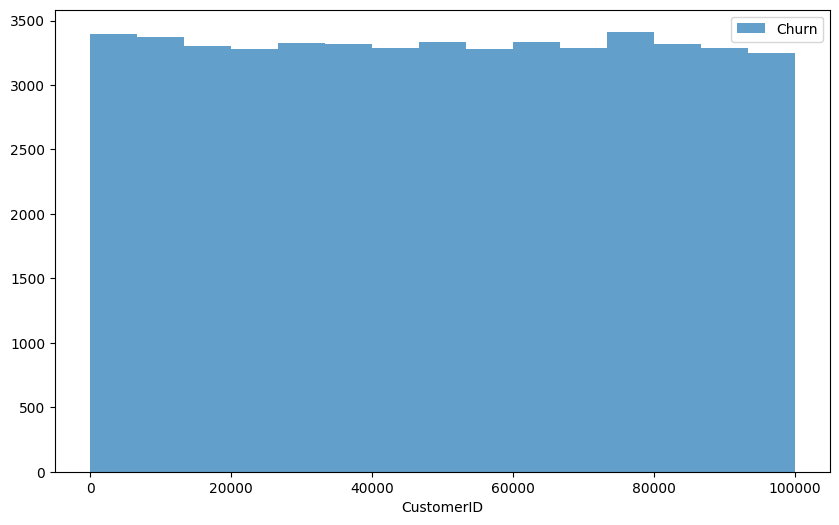

_____________________________________________________________________________________________________________________________________
Distribution of the Age for Churned


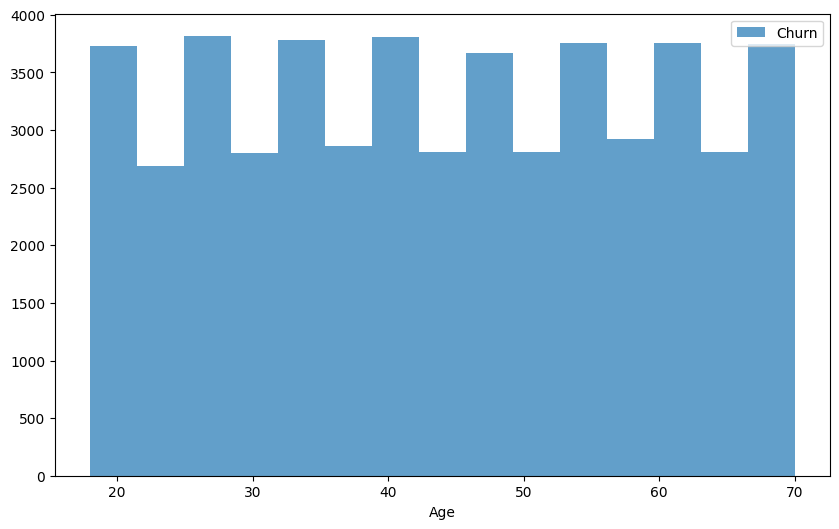

_____________________________________________________________________________________________________________________________________
Distribution of the Subscription_Length_Months for Churned


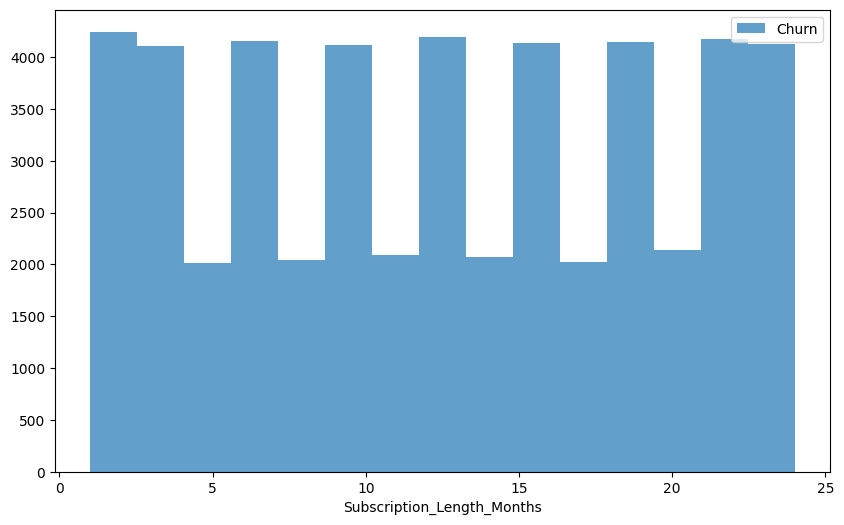

_____________________________________________________________________________________________________________________________________
Distribution of the Monthly_Bill for Churned


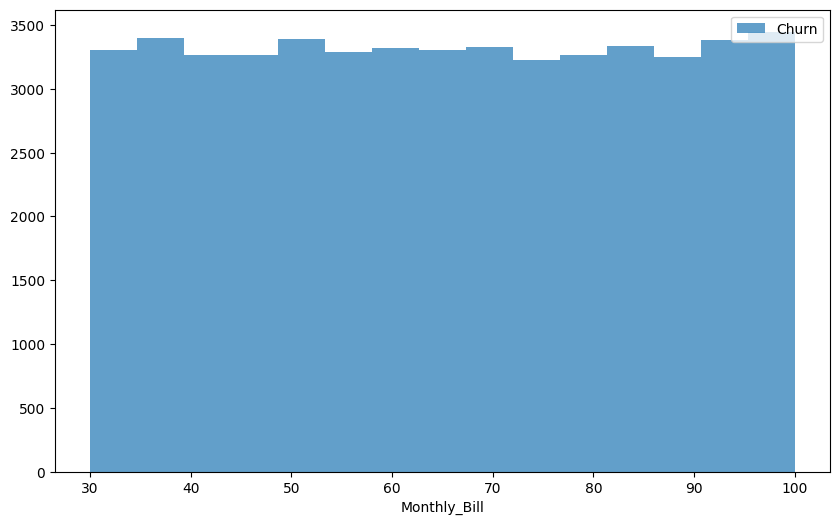

_____________________________________________________________________________________________________________________________________
Distribution of the Total_Usage_GB for Churned


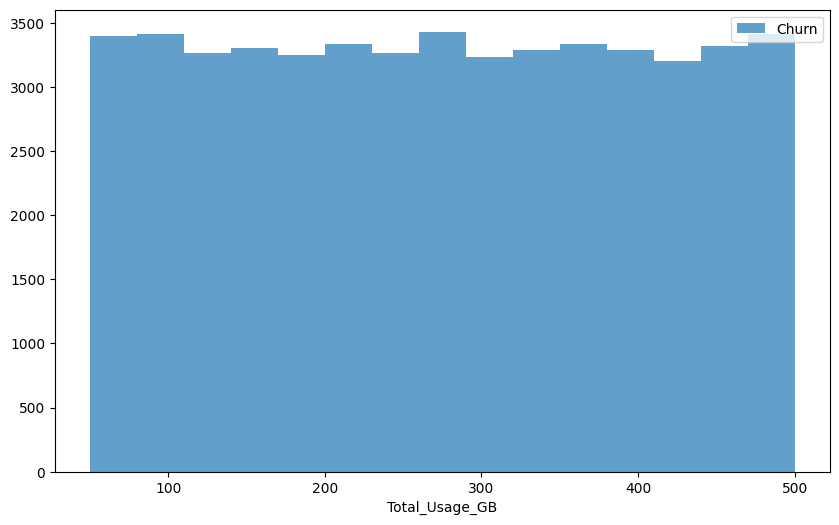

In [ ]:
for num in numerical_columns:
    print("_____________________________________________________________________________________________________________________________________")
    print("Distribution of the {} for Churned".format(num))
    plt.figure(figsize=(10,6))
    plt.xlabel(num)
    plt.hist(churned[num],bins=15, alpha=0.7, label="Churn")
    plt.legend(loc='upper right')
    plt.show()

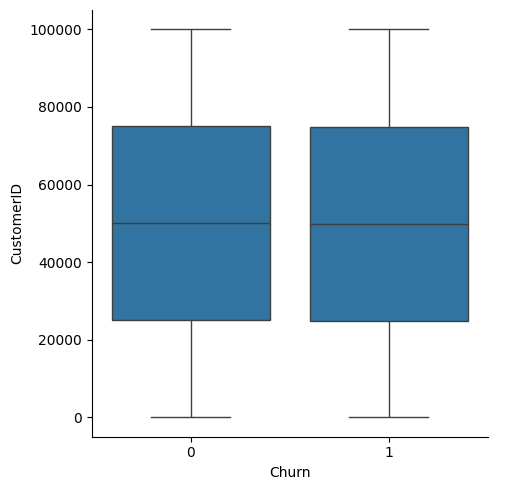

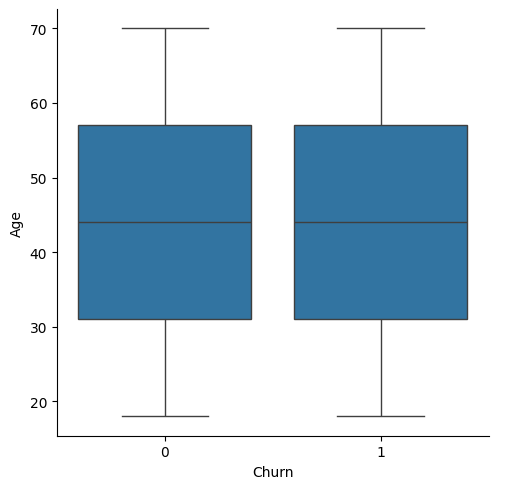

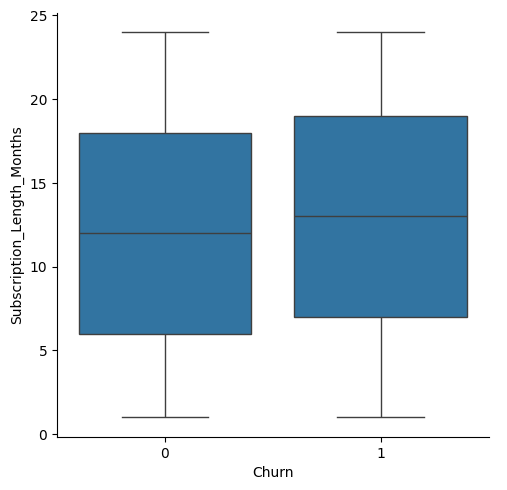

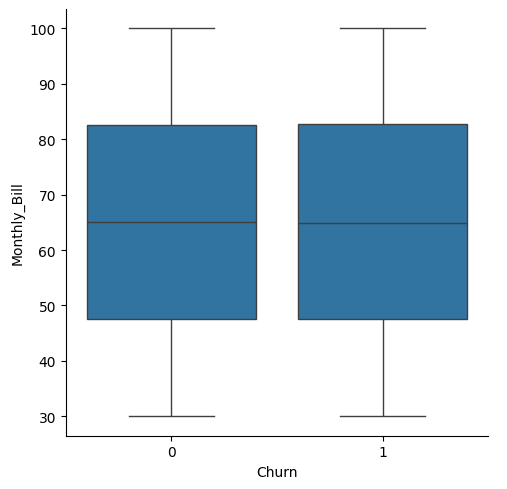

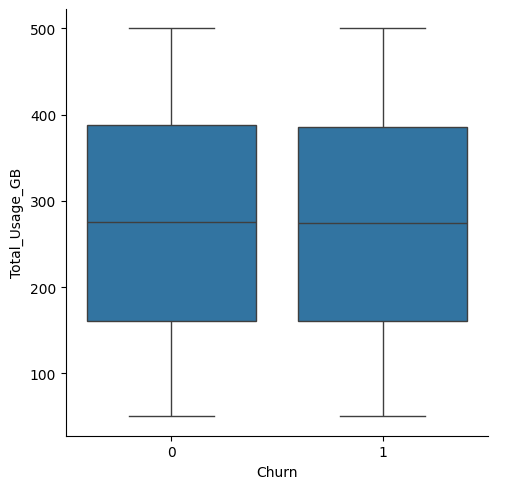

In [ ]:
for num in numerical_columns:
    sns.catplot(data = df,x = 'Churn',y =  num, kind='box')

### Correlation Matrix

In [ ]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [ ]:
# Churn correlation matrix
# k = 10 #number of variables for heatmap
# cols = df.corr().nlargest(k, 'Churn')['Churn'].index
# cm = df[cols].corr()
# plt.figure(figsize=(10,6))
# sns.heatmap(cm, annot=True, cmap = 'viridis')

Text(0.5, 1.0, 'Correlation Matrix')

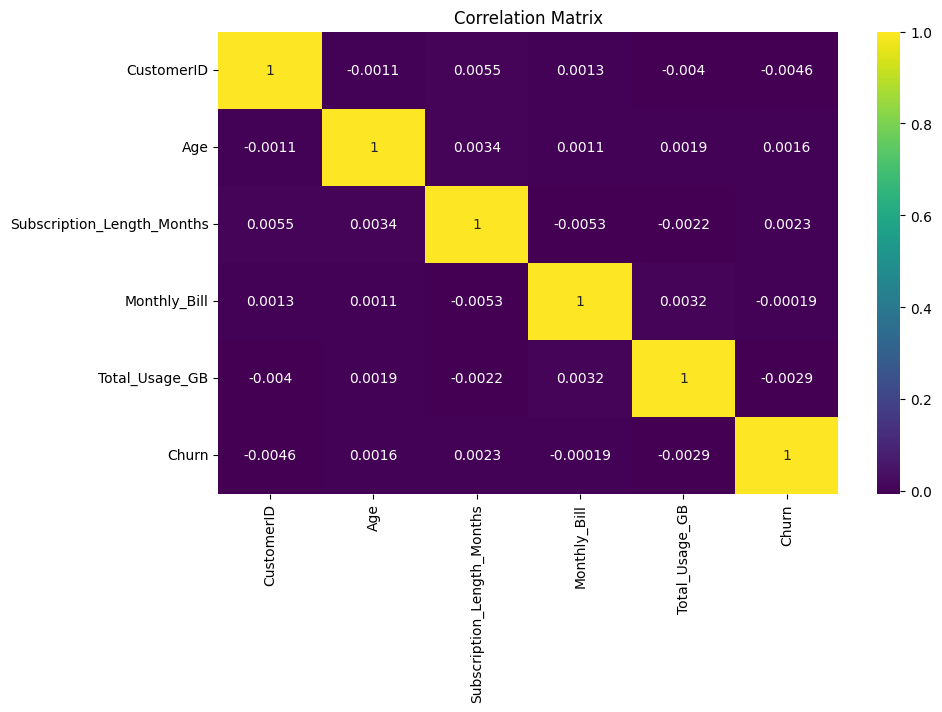

In [ ]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df.corr(method = 'spearman'), annot =True, cmap = 'viridis')
plt.title('Correlation Matrix')

**Reading Correlation Matrix**


*   Correlation coefficient range from -1 to +1
*   Sign(+/-) indicate the direction and amount indicate the strength of correlation
*   +1.00 means perfect positive relationship
*   0.00 means no relationship
*   -1.00 means perfect negative relationship

From here we can observe there is no highly corelated features

## Missing Values

In [ ]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There are no Null values so we can proceed further

## Outlier Detection

In [ ]:
def outlier_detection(dataframe):
  """
  This will find the outlier in given dataset. To get the index fo the outlier data

  Input Parameters
  ----------------
  dataframe : single column dataframe

  Output Parameters
  -----------------
  outlier : Index of outlier training examples.
  """
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [ ]:
for column in numerical_columns:
    print(f'\nOutliers in column "{column}" ')
    outlier = outlier_detection(df[column])
    print(outlier)


Outliers in column "CustomerID" 
Series([], Name: CustomerID, dtype: int64)

Outliers in column "Age" 
Series([], Name: Age, dtype: int64)

Outliers in column "Subscription_Length_Months" 
Series([], Name: Subscription_Length_Months, dtype: int64)

Outliers in column "Monthly_Bill" 
Series([], Name: Monthly_Bill, dtype: float64)

Outliers in column "Total_Usage_GB" 
Series([], Name: Total_Usage_GB, dtype: int64)


**We can Observe that there are no outliers for the given dataset**

## Duplicacy

In [ ]:
duplicate = df[df.duplicated()]
print('Duplicate rows:')
duplicate

Duplicate rows:


,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


# Feature Engineering

In [ ]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


## Observing P value

In [ ]:
for col in numerical_columns:
  t_statistic, p_value = stats.ttest_ind(churned[col], not_churned[col])
  print(p_value)
  if p_value < 0.05:
    print("The difference is statistically significant.")
  else:
    print("The difference is not statistically significant.")

0.14703274006544723
The difference is not statistically significant.
0.6220492649740325
The difference is not statistically significant.
0.4615805837995207
The difference is not statistically significant.
0.9467266786704482
The difference is not statistically significant.
0.36888531937756586
The difference is not statistically significant.


**Trying Making a new column which tells the CHurn rate on the basis of location**

In [ ]:
# Group the data by 'Location'
location_groups = df.groupby('Location')

# Total number of customers in each location
total_customers = location_groups.size()

# Number of churned customers in each location
churned_customers = location_groups['Churn'].sum()

# Churn rate for each location
churn_rate = (churned_customers / total_customers) * 100

# Creating a DataFrame to store the churn rate for each location
churn_rate_df = pd.DataFrame({'Location': churn_rate.index, 'Individual_Location_Churn_Rate': churn_rate.values})

churn_rate_df

,Location,Individual_Location_Churn_Rate
0,Chicago,49.829642
1,Houston,49.109490
2,Los Angeles,49.298937
3,Miami,50.302032
4,New York,50.365921


**Trying Adding some more columns for better predictions**

In [ ]:
new_df = df.merge(churn_rate_df, on='Location', how= 'left')
new_df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Individual_Location_Churn_Rate
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,49.298937
1,2,Customer_2,62,Female,New York,1,48.76,172,0,50.365921
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,49.298937
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,50.302032
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,50.302032
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1,49.109490
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0,50.365921
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1,49.829642
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1,50.365921


In [ ]:
# new_df['Subscription_Length_as_per_Age'] = df['Subscription_Length_Months']/df['Age']
# new_df['Total_spent'] = df['Monthly_Bill']*df['Subscription_Length_Months']
# new_df['Monthly_Bill_&_Total_usage'] = (df['Monthly_Bill']*df['Total_Usage_GB'])/df['Subscription_Length_Months']

## Binning

In [ ]:
# Binning
bins = [0, 18, 30, 40, 50, float('inf')]  # Age intervals
labels = ['Teen', 'Adults', 'Tricenarian', 'Mid_age', 'Old_age']  # Labels for the bins
new_df['Age'] = pd.cut(new_df['Age'], bins=bins, labels=labels)

In [ ]:
new_df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Individual_Location_Churn_Rate
0,1,Customer_1,Old_age,Male,Los Angeles,17,73.36,236,0,49.298937
1,2,Customer_2,Old_age,Female,New York,1,48.76,172,0,50.365921
2,3,Customer_3,Adults,Female,Los Angeles,5,85.47,460,0,49.298937
3,4,Customer_4,Tricenarian,Female,Miami,3,97.94,297,1,50.302032
4,5,Customer_5,Mid_age,Female,Miami,19,58.14,266,0,50.302032
...,...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,Tricenarian,Male,Houston,23,55.13,226,1,49.109490
99996,99997,Customer_99997,Old_age,Female,New York,19,61.65,351,0,50.365921
99997,99998,Customer_99998,Old_age,Male,Chicago,17,96.11,251,1,49.829642
99998,99999,Customer_99999,Old_age,Female,New York,20,49.25,434,1,50.365921


In [ ]:
new_df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn',
       'Individual_Location_Churn_Rate'],
      dtype='object')

## Encoding Categorical Variables - One Hot Encoding

In [ ]:
# Targets of One Hot Encoding
#Age is also converted to categorical column
categorical_columns.append('Age')

In [ ]:
categorical_columns

['Gender', 'Location', 'Age']

In [ ]:
new_df.Age.unique() #unique values of Age variable

['Old_age', 'Adults', 'Tricenarian', 'Mid_age', 'Teen']
Categories (5, object): ['Teen' < 'Adults' < 'Tricenarian' < 'Mid_age' < 'Old_age']

In [ ]:
df1 = pd.get_dummies(new_df, columns =categorical_columns, drop_first = True) #Generating dummy variables

In [ ]:
df1.head(10)

,CustomerID,Name,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Individual_Location_Churn_Rate,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Adults,Age_Tricenarian,Age_Mid_age,Age_Old_age
0,1,Customer_1,17,73.36,236,0,49.298937,1,0,1,0,0,0,0,0,1
1,2,Customer_2,1,48.76,172,0,50.365921,0,0,0,0,1,0,0,0,1
2,3,Customer_3,5,85.47,460,0,49.298937,0,0,1,0,0,1,0,0,0
3,4,Customer_4,3,97.94,297,1,50.302032,0,0,0,1,0,0,1,0,0
4,5,Customer_5,19,58.14,266,0,50.302032,0,0,0,1,0,0,0,1,0
5,6,Customer_6,15,82.65,456,1,50.365921,1,0,0,0,1,0,0,0,1
6,7,Customer_7,3,73.79,269,0,49.829642,0,0,0,0,0,1,0,0,0
7,8,Customer_8,1,97.70,396,1,50.302032,0,0,0,1,0,0,0,0,1
8,9,Customer_9,10,42.45,150,1,50.302032,0,0,0,1,0,1,0,0,0
9,10,Customer_10,12,64.49,383,1,49.298937,0,0,1,0,0,0,0,0,1


## Scaling

In [ ]:
df1 = df1.drop(['CustomerID','Name'], axis = 1)

In [ ]:
df1.shape

(100000, 14)

In [ ]:
df1

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Individual_Location_Churn_Rate,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Adults,Age_Tricenarian,Age_Mid_age,Age_Old_age
0,17,73.36,236,0,49.298937,1,0,1,0,0,0,0,0,1
1,1,48.76,172,0,50.365921,0,0,0,0,1,0,0,0,1
2,5,85.47,460,0,49.298937,0,0,1,0,0,1,0,0,0
3,3,97.94,297,1,50.302032,0,0,0,1,0,0,1,0,0
4,19,58.14,266,0,50.302032,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,23,55.13,226,1,49.109490,1,1,0,0,0,0,1,0,0
99996,19,61.65,351,0,50.365921,0,0,0,0,1,0,0,0,1
99997,17,96.11,251,1,49.829642,1,0,0,0,0,0,0,0,1
99998,20,49.25,434,1,50.365921,0,0,0,0,1,0,0,0,1


In [ ]:
# Scaling features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


In [ ]:
new_cols = ['Gender_Male', 'Location_Houston', 'Location_LosAngeles', 'Location_Miami','Location_NewYork','Age_Old_age','Age_Adults','Age_Tricenarian','Age_Mid_age']
like_num = [col for col in df1.columns if df1[col].dtypes != 'O' and len(df1[col].value_counts()) <= 3]
cols_need_scale = [col for col in df1.columns if col not in new_cols
                   and col not in "Churn"
                   and col not in like_num]
print(like_num)
cols_need_scale

['Churn', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York', 'Age_Adults', 'Age_Tricenarian', 'Age_Mid_age', 'Age_Old_age']


['Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB',
 'Individual_Location_Churn_Rate']

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
for col in cols_need_scale:
    df1[col] = robust_scaler(df1[col])

In [ ]:
df1.tail(10)

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Individual_Location_Churn_Rate,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Adults,Age_Tricenarian,Age_Mid_age,Age_Old_age
99990,-0.231,-0.817,0.699,0,0.000,1,0,0,0,0,0,0,0,1
99991,0.154,0.252,0.221,1,0.471,0,0,0,1,0,0,0,0,1
99992,0.462,-0.545,-0.199,0,0.535,1,0,0,0,1,0,0,1,0
99993,0.231,0.562,0.168,1,-0.718,0,1,0,0,0,1,0,0,0
99994,-0.308,-0.867,-0.327,0,-0.718,0,1,0,0,0,0,0,1,0
99995,0.846,-0.281,-0.212,1,-0.718,1,1,0,0,0,0,1,0,0
99996,0.538,-0.096,0.341,0,0.535,0,0,0,0,1,0,0,0,1
99997,0.385,0.886,-0.102,1,0.000,1,0,0,0,0,0,0,0,1
99998,0.615,-0.449,0.708,1,0.535,0,0,0,0,1,0,0,0,1
99999,0.538,0.329,-0.447,1,-0.529,0,0,1,0,0,1,0,0,0


Text(0.5, 1.0, 'Correlation Matrix')

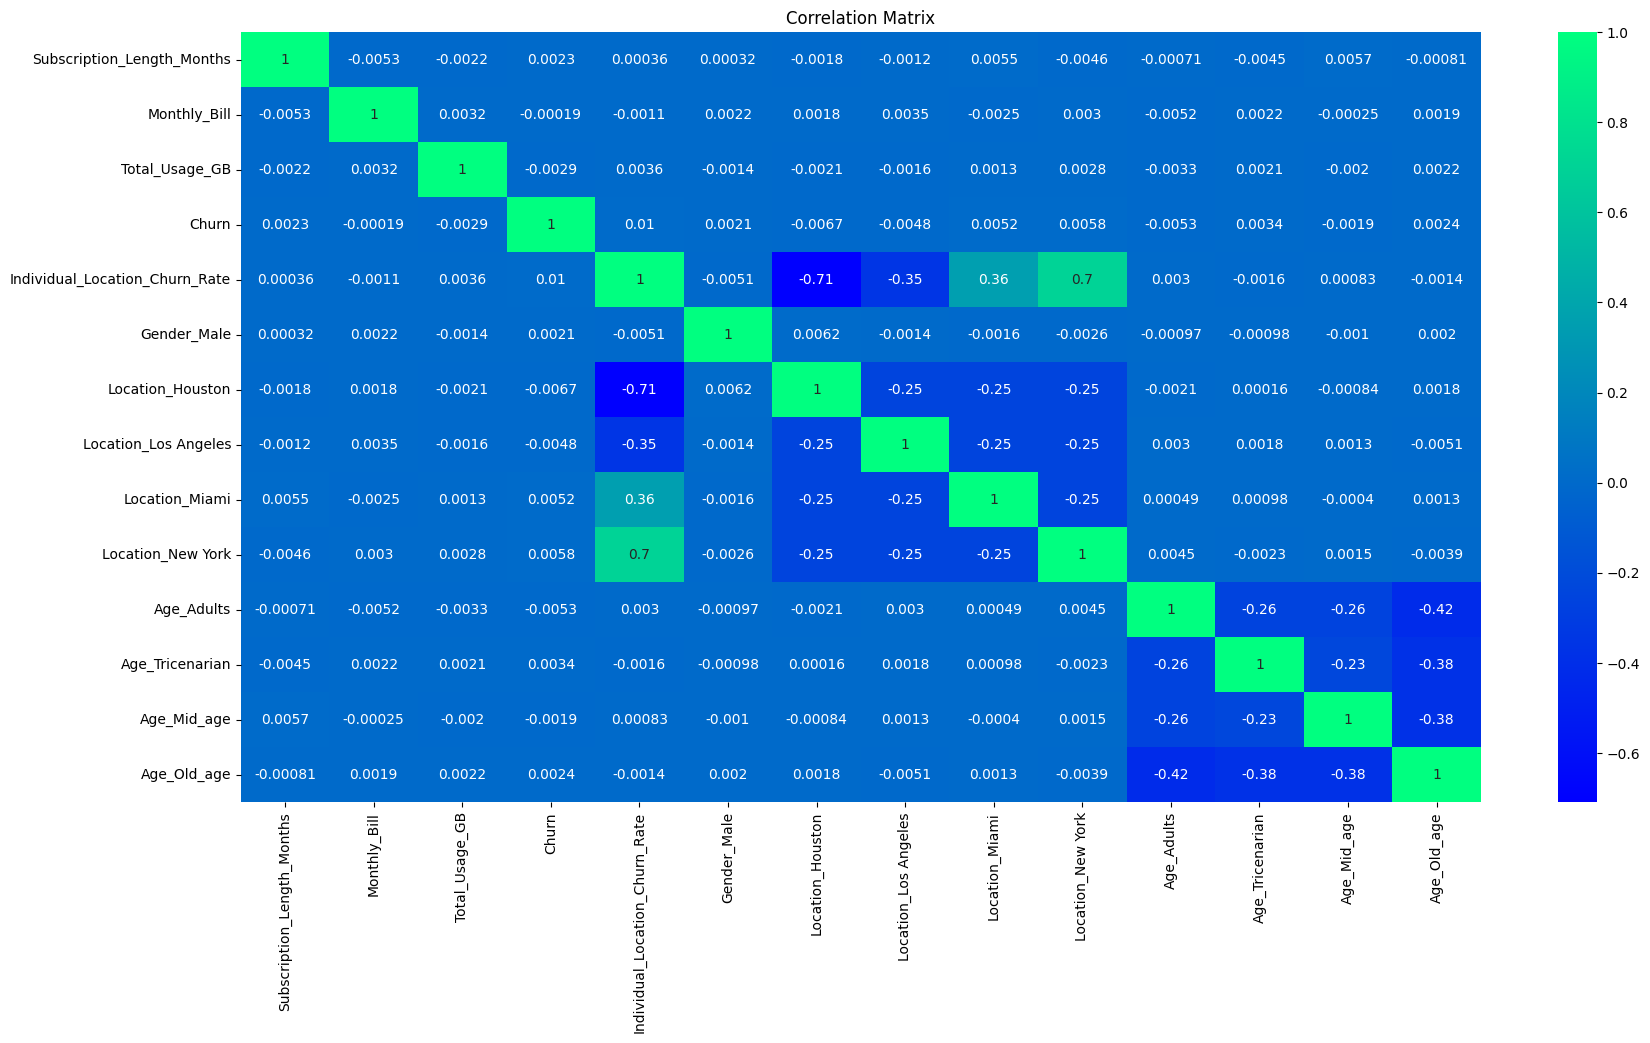

In [ ]:
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
sns.heatmap(df1.corr(method = 'spearman'), annot =True, cmap = 'winter')
plt.title('Correlation Matrix')

**We have to remove variables that are having high correlation becaurse they can cause multicolinearity**

In [ ]:
df1.drop(['Individual_Location_Churn_Rate'], axis = 1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

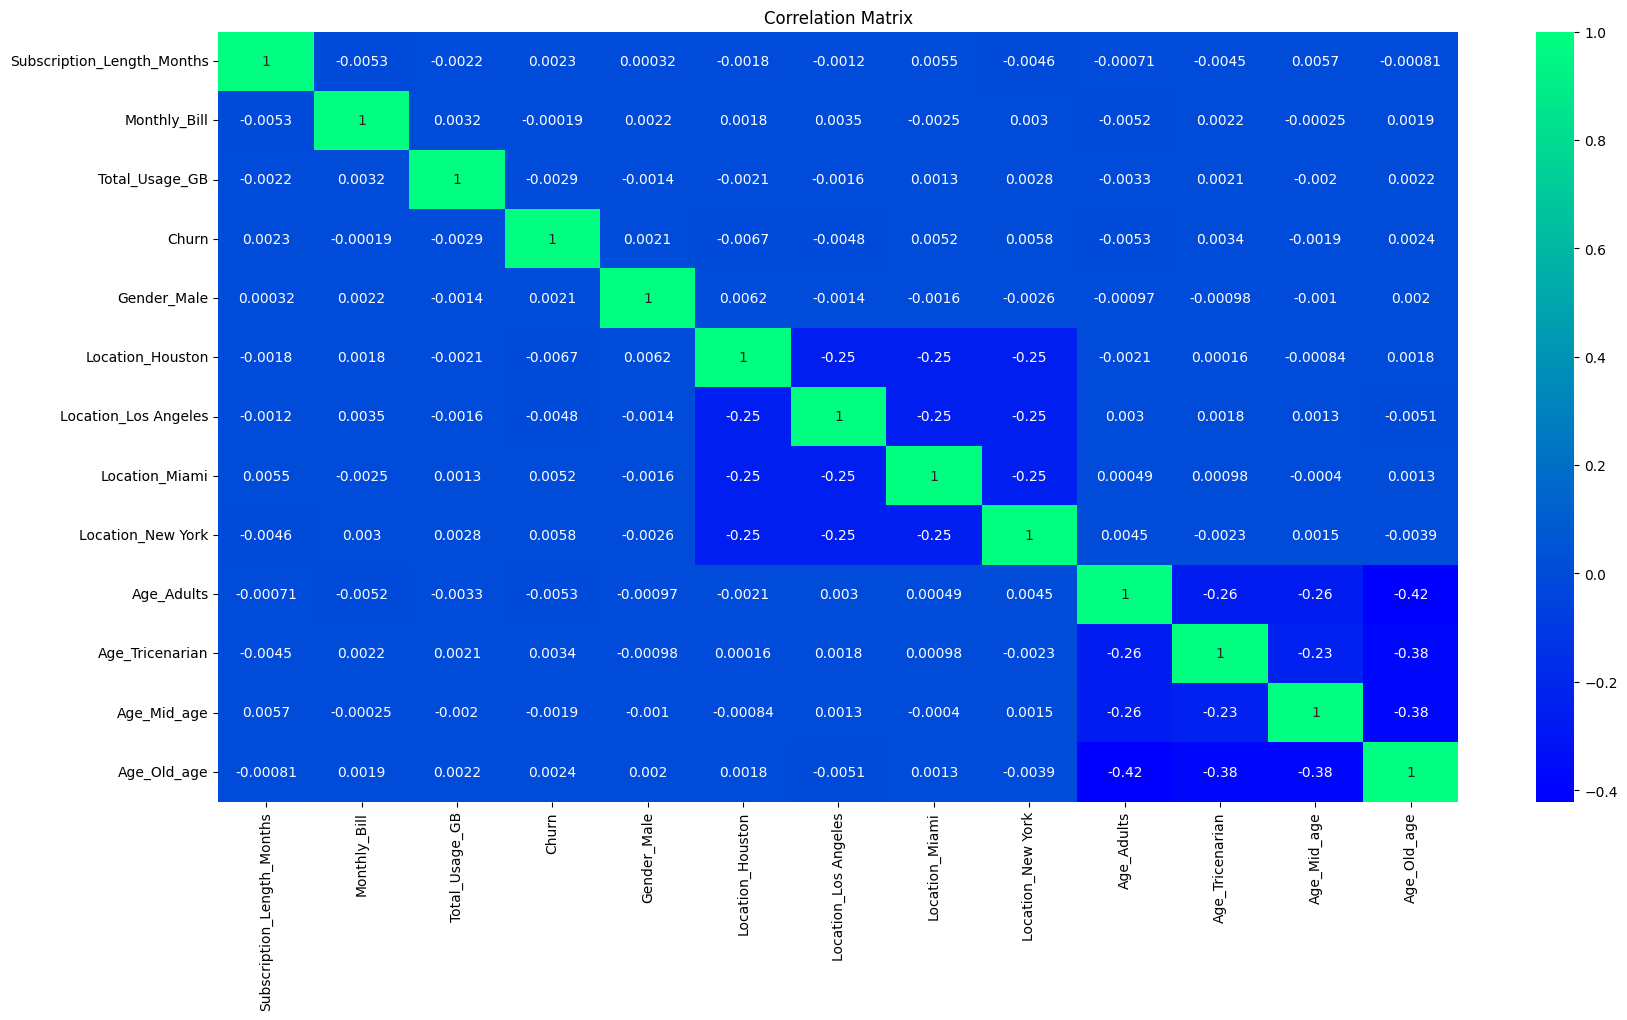

In [ ]:
plt.rcParams["figure.figsize"] = (20,10) # Custom figure size in inches
sns.heatmap(df1.corr(method = 'spearman'), annot =True, cmap = 'winter')
plt.title('Correlation Matrix')

## Splitting Dataset

In [ ]:
y = df1.iloc[:, 3].values
df1.drop('Churn', axis = 1)

,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age_Adults,Age_Tricenarian,Age_Mid_age,Age_Old_age
0,0.385,0.238,-0.168,1,0,1,0,0,0,0,0,1
1,-0.846,-0.463,-0.451,0,0,0,0,1,0,0,0,1
2,-0.538,0.583,0.823,0,0,1,0,0,1,0,0,0
3,-0.692,0.938,0.102,0,0,0,1,0,0,1,0,0
4,0.538,-0.196,-0.035,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.846,-0.281,-0.212,1,1,0,0,0,0,1,0,0
99996,0.538,-0.096,0.341,0,0,0,0,1,0,0,0,1
99997,0.385,0.886,-0.102,1,0,0,0,0,0,0,0,1
99998,0.615,-0.449,0.708,0,0,0,0,1,0,0,0,1


In [ ]:
X = df1.iloc[:, :].values

In [ ]:
X

array([[ 0.385,  0.238, -0.168, ...,  0.   ,  0.   ,  1.   ],
       [-0.846, -0.463, -0.451, ...,  0.   ,  0.   ,  1.   ],
       [-0.538,  0.583,  0.823, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.385,  0.886, -0.102, ...,  0.   ,  0.   ,  1.   ],
       [ 0.615, -0.449,  0.708, ...,  0.   ,  0.   ,  1.   ],
       [ 0.538,  0.329, -0.447, ...,  0.   ,  0.   ,  0.   ]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train

array([[ 0.769, -0.501,  0.119, ...,  0.   ,  0.   ,  0.   ],
       [ 0.538, -0.788,  0.642, ...,  0.   ,  1.   ,  0.   ],
       [-0.308, -0.031, -0.863, ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 0.   ,  0.262, -0.088, ...,  0.   ,  0.   ,  0.   ],
       [-0.154, -0.199, -0.58 , ...,  0.   ,  0.   ,  1.   ],
       [-0.846,  0.511,  0.978, ...,  1.   ,  0.   ,  0.   ]])

# Model Building

In [ ]:
X_train.shape

(75000, 13)

## Model Selection

## Model Training

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 4, verbose = 1)
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(4, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(4, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.00001), loss = 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs= 10, callbacks=[callback])
model.fit(X_train, y_train, epochs= 20)

Epoch 1/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.7141 - accuracy: 0.5153
Epoch 2/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.7049 - accuracy: 0.5299
Epoch 3/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.6971 - accuracy: 0.5474
Epoch 4/20
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6899 - accuracy: 0.5665
Epoch 5/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.6828 - accuracy: 0.5852
Epoch 6/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.6755 - accuracy: 0.6042
Epoch 7/20
2344/2344 [==============================] - 7s 3ms/step - loss: 0.6675 - accuracy: 0.6224
Epoch 8/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.6587 - accuracy: 0.6403
Epoch 9/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.6489 - accuracy: 0.6579
Epoch 10/20
2344/2344 [==============================] - 8s 3ms/step - loss: 0.637

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

782/782 [==============================] - 1s 1ms/step
[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4189 - accuracy: 0.9344


[0.4189133942127228, 0.9344000220298767]

In [122]:
accuracy_score(y_test,y_pred)

0.9344

In [123]:
# Classification Report for XGB Model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93     10841
        True       1.00      0.88      0.94     14159

    accuracy                           0.93     25000
   macro avg       0.93      0.94      0.93     25000
weighted avg       0.94      0.93      0.93     25000



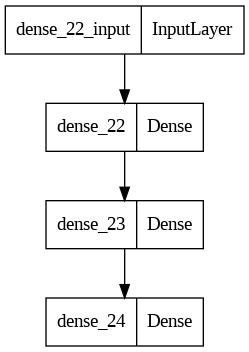

In [129]:
from keras.utils import plot_model
plot_model(model)

In [127]:
def generate_auc_roc_curve(clf, X_test):
    y_pred = clf.predict(X_test)
    y_pred = (y_pred > 0.5)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

782/782 [==============================] - 1s 1ms/step


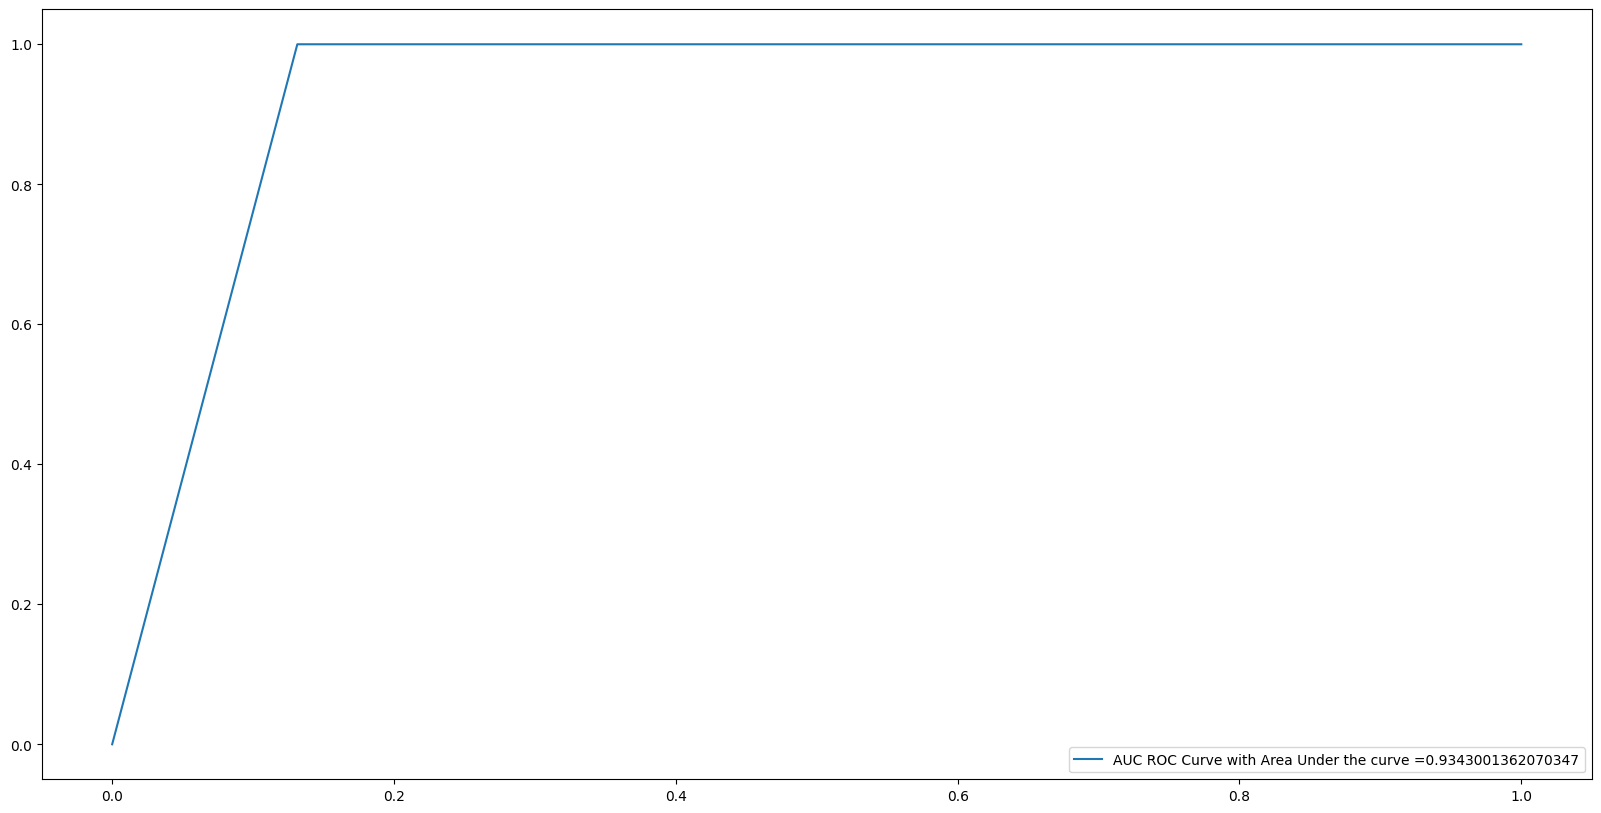

In [128]:
generate_auc_roc_curve(model, X_test)

# Model Tuning

**The commented code below is the model Tuning for LightGBM clasiifier and Gradient Boosting Classifier but because of the less accuracy all models are rejected and Neural Network is used**

The model tuning can also be done for the current model on the requirement basis but since the accuracy acheived is good we will leave it here.

In [ ]:
# # LightGBM:
# lgb_model = LGBMClassifier(silent = True)
# # Model Tuning
# lgbm_params = {'colsample_bytree': 0.5,
#  'learning_rate': 0.01,
#  'max_depth': 6,
#  'n_estimators': 500,
#  'verbosity': -1,
#  'force_col_wise': True }

# lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

In [ ]:
# # GBM
# gbm_model = GradientBoostingClassifier()
# # Model Tuning
# gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
# gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [ ]:
# lgbm_tuned.set_params(silent=True)

# # evaluate each model in turn
# models = [("LightGBM", lgbm_tuned),
#           ("GB",gbm_tuned)]
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits=10)
#     cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

In [ ]:
# for name, model in models:
#         base = model.fit(X_train,y_train)
#         y_pred = base.predict(X_test)
#         acc_score = accuracy_score(y_test, y_pred)
#         feature_imp = pd.Series(base.feature_importances_,
#                         index=X.columns).sort_values(ascending=False)

#         sns.barplot(x=feature_imp, y=feature_imp.index)
#         plt.xlabel('Variable Importance Scores')
#         plt.ylabel('Variables')
#         plt.title(name)
#         plt.show()

# Save Model

In [130]:
import pickle
pickle.dump(model,open('model.pkl','wb'))